In [1]:
import molmap

In [2]:
metric = 'cosine'
method = 'umap'
n_neighbors = 30
min_dist = 0.1

In [3]:
mp_name = 'fingerprint.mp'
bitsinfo = molmap.feature.fingerprint.Extraction().bitsinfo
flist = bitsinfo[bitsinfo.Subtypes.isin(['MACCSFP', '' , ''])].IDs.tolist()
mp2 = molmap.MolMap(ftype = 'fingerprint', metric = metric, flist = flist)
mp2.fit(method = method, n_neighbors = n_neighbors, min_dist = min_dist)
mp2.save(mp_name) ## save it as a featurizer

UMAP(metric='precomputed', n_neighbors=30, random_state=1, verbose=2)
Construct fuzzy simplicial set
Fri Sep  8 19:33:19 2023 Finding Nearest Neighbors
Fri Sep  8 19:33:19 2023 Finished Nearest Neighbor Search
Fri Sep  8 19:33:21 2023 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Sep  8 19:33:22 2023 Finished embedding
2023-09-08 19:33:22,941 - INFO - [bidd-molmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2023-09-08 19:33:22,986 - INFO - [bidd-molmap] - Finished


['fingerprint.mp']

In [4]:
smiles1 = 'CC(=O)OC1=CC=CC=C1C(O)=O' #aspirin
smiles2 = 'CC(=O)NC1=CC=CC=C1C(O)=O' #N‐acetylanthranilic acid

In [5]:
X1 = mp2.batch_transform([smiles1, smiles2])

100%|##########| 2/2 [00:00<00:00, 30.10it/s]


In [6]:
len(mp2.flist)

162

In [7]:
27*27

729

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

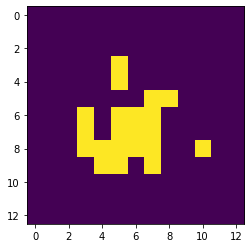

In [9]:
plt.imshow(X1[0])

In [10]:
X1.shape

(2, 13, 13, 1)

In [11]:
type(X1)

numpy.ndarray

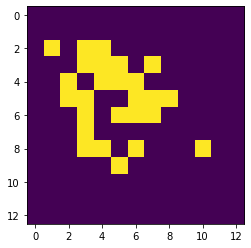

In [12]:
plt.imshow(X1[1])

In [3]:
import pandas as pd

In [4]:
data1 = pd.read_csv('/raid/wx_home/learning/small molecule/190w_3D_label.csv')

In [5]:
data1

,Unnamed: 0,ChEMBL ID,Smiles,Protease,Nuclear receptor,kinase,G-protein coupled receptor,X,Y,Z
0,0,CHEMBL1206185,CCCCCCCCCCC#CC(N)c1ccccc1-c1ccc(Sc2ccc(OCCCC)c...,0,0,0,0,8.639874,25.302584,27.680168
1,1,CHEMBL539070,CCCOc1ccccc1-c1nnc(NN)s1.Cl,0,0,0,0,68.223070,45.071560,67.574005
2,2,CHEMBL3335528,COC(=O)[C@H](O[C@@H]1O[C@@H](C)[C@@H](O)[C@@H]...,0,0,0,0,9.401422,53.991955,15.704758
3,3,CHEMBL2419030,O=c1nc(NC2CCCC2)sc2c([N+](=O)[O-])cc(C(F)(F)F)...,0,0,0,0,39.407284,19.617073,8.793589
4,4,CHEMBL4301448,N=C(N)NCCCOc1ccc(CNc2nc3ccc(Oc4ccc(F)cc4)cc3s2...,0,0,0,0,25.241755,16.690560,31.145899
...,...,...,...,...,...,...,...,...,...,...
1943043,1943043,CHEMBL2017916,COc1ccc(-c2nnc(NC(=O)c3cccnc3)s2)cc1,0,0,0,0,49.509163,40.188408,30.180275
1943044,1943044,CHEMBL374652,CC(O)(CSc1ccc(F)cc1)c1cc2cc(Cl)c(C(F)(F)F)cc2[...,0,2,0,0,27.706348,32.849113,48.760990
1943045,1943045,CHEMBL1416264,O=C(CSc1ccc2nnc(-c3cccnc3)n2n1)Nc1ccc(F)cc1,0,0,0,0,50.994682,41.838090,14.162477
1943046,1943046,CHEMBL213734,O=C(COc1ccccc1)Nc1ccc([N+](=O)[O-])cc1O,0,0,0,0,33.808820,50.675800,30.621050


In [6]:
data2 = data1.dropna()
data2

,Unnamed: 0,ChEMBL ID,Smiles,Protease,Nuclear receptor,kinase,G-protein coupled receptor,X,Y,Z
0,0,CHEMBL1206185,CCCCCCCCCCC#CC(N)c1ccccc1-c1ccc(Sc2ccc(OCCCC)c...,0,0,0,0,8.639874,25.302584,27.680168
1,1,CHEMBL539070,CCCOc1ccccc1-c1nnc(NN)s1.Cl,0,0,0,0,68.223070,45.071560,67.574005
2,2,CHEMBL3335528,COC(=O)[C@H](O[C@@H]1O[C@@H](C)[C@@H](O)[C@@H]...,0,0,0,0,9.401422,53.991955,15.704758
3,3,CHEMBL2419030,O=c1nc(NC2CCCC2)sc2c([N+](=O)[O-])cc(C(F)(F)F)...,0,0,0,0,39.407284,19.617073,8.793589
4,4,CHEMBL4301448,N=C(N)NCCCOc1ccc(CNc2nc3ccc(Oc4ccc(F)cc4)cc3s2...,0,0,0,0,25.241755,16.690560,31.145899
...,...,...,...,...,...,...,...,...,...,...
1943043,1943043,CHEMBL2017916,COc1ccc(-c2nnc(NC(=O)c3cccnc3)s2)cc1,0,0,0,0,49.509163,40.188408,30.180275
1943044,1943044,CHEMBL374652,CC(O)(CSc1ccc(F)cc1)c1cc2cc(Cl)c(C(F)(F)F)cc2[...,0,2,0,0,27.706348,32.849113,48.760990
1943045,1943045,CHEMBL1416264,O=C(CSc1ccc2nnc(-c3cccnc3)n2n1)Nc1ccc(F)cc1,0,0,0,0,50.994682,41.838090,14.162477
1943046,1943046,CHEMBL213734,O=C(COc1ccccc1)Nc1ccc([N+](=O)[O-])cc1O,0,0,0,0,33.808820,50.675800,30.621050


In [14]:
data2['Smiles'][0]

'CCCCCCCCCCC#CC(N)c1ccccc1-c1ccc(Sc2ccc(OCCCC)cc2)c(S(=O)(=O)O)c1'

In [ ]:
X2 = mp2.batch_transform(data2['Smiles'])

  0%|          | 79/1937109 [00:06<77:31:56,  6.94it/s]

In [9]:
from joblib import load,dump

In [ ]:
dump(X2, '/raid/wx_home/learning/2_190w_model_new/melucule2.data2')